In [2]:
%pip install numpy
%pip install scipy

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 110.1 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/60.6 kB 110.1 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.6 kB 164.3 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 201.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/45.9 MB 1.5 MB/s eta 0:00:31
   ---------------------------------------- 0.3/45.9 MB 3.5 MB/s eta 0:00:14
    -----------------------------------

In [15]:
# Linear Congruential Generator (LCG) parameters
m = 2147483647  # Modulus
a = 16807       # Multiplier
c = 0           # Increment

# Function to generate random numbers using LCG
def lcg_random(seed, n):
    random_numbers = []
    x = seed
    for _ in range(n):
        x = (a * x + c) % m
        random_numbers.append(x / m)  # Normalize to [0, 1)
    return random_numbers

# Function to generate Bernoulli random sample using LCG
def bernoulli_lcg(p, seed, n):
    bernoulli_samples = []
    lcg_samples = lcg_random(seed, n)
    for sample in lcg_samples:
        if sample < p:
            bernoulli_samples.append(1)  # Success
        else:
            bernoulli_samples.append(-1)  # Failure
    return bernoulli_samples

# Generate Bernoulli random samples with probability p = 0.3 using LCG with seed 12345
p = 0.3
seed = 12345
n = 10  # Number of samples
bernoulli_samples = bernoulli_lcg(p, seed, n)
print("Bernoulli random samples generated using LCG:", bernoulli_samples)


Bernoulli random samples generated using LCG: [1, -1, -1, 1, 1, 1, -1, -1, -1, -1]


In [32]:
import random

# Function to generate Bernoulli random sample using inverse transform sampling
def bernoulli_inverse_transform(p, n):
    bernoulli_samples = []
    for _ in range(n):
        u = random.random()  # Generate a uniform random number between 0 and 1
        if u < p:
            bernoulli_samples.append(1)  # Success
        else:
            bernoulli_samples.append(0)  # Failure
    return bernoulli_samples

# Generate Bernoulli random samples with probability p = 0.3 using inverse transform sampling
p = 0.3
n = 10  # Number of samples
bernoulli_samples = bernoulli_inverse_transform(p, n)
print("Bernoulli random samples generated using inverse transform sampling:", bernoulli_samples)


Bernoulli random samples generated using inverse transform sampling: [1, 0, 0, 0, 1, 0, 0, 1, 0, 0]


In [1]:
import numpy as np
from scipy.stats import norm, bernoulli

N = 10000
B = 20

Y = 2 * bernoulli.rvs(p=1/2, loc=0, size=(B, N), random_state=0) - 1
X = np.cumsum(Y, axis=1)

In [5]:
Y

array([[ 1,  1,  1, ...,  1, -1,  1],
       [ 1, -1, -1, ..., -1, -1,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ...,  1,  1, -1],
       [ 1,  1, -1, ..., -1, -1, -1],
       [ 1,  1,  1, ..., -1, -1,  1]], dtype=int64)

In [4]:
%pip install matplotlib


  Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl (7.7 MB)
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.51.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl (56 kB)
Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl (2.5 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


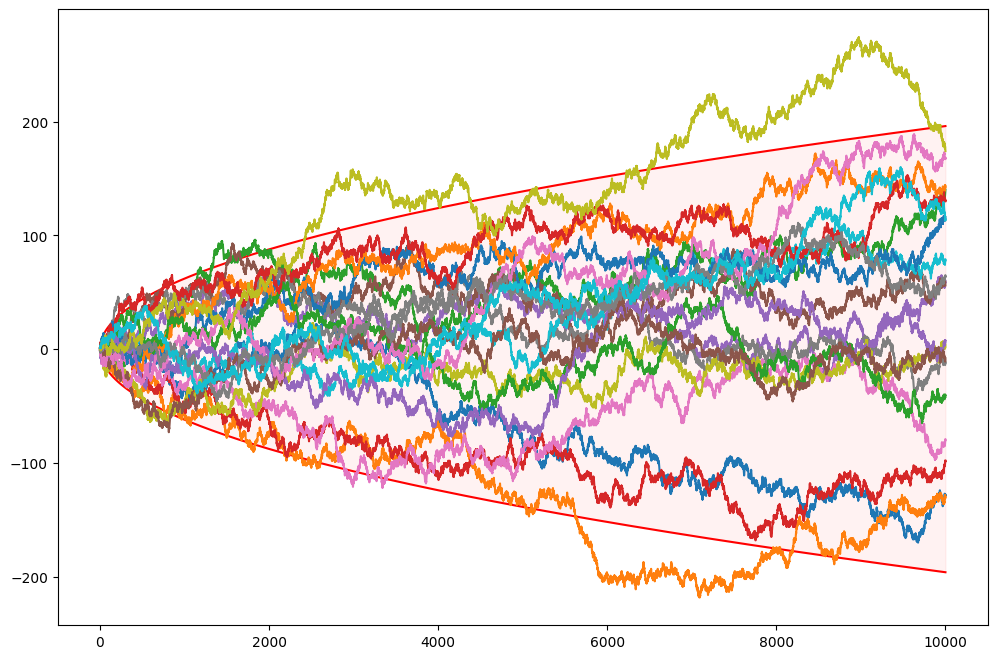

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))

nn = np.arange(1, N + 1)

z = norm.ppf(0.975)
plt.plot(nn, z * np.sqrt(nn), color='red')
plt.plot(nn, -z * np.sqrt(nn), color='red')
plt.fill_between(nn, z * np.sqrt(nn), -z * np.sqrt(nn), color='red', alpha=0.05)

for b in range(B):
    plt.plot(nn, X[b])

plt.show()